# Digital Signal and Image Management
###### Assignment 3

> **Cognome**: Davoli    **Nome**: Sofia                                 \\
> **Matricola**: 813479                                                     \\
                                  \\


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

#-- File Management
from google.colab import drive

#-- Plot Parameters
plt.rcParams['figure.figsize'] = [15, 5]

In [ ]:
#!pip install opencv_contrib_python==3.4.2.17 --force-reinstall

## File Reading


In [2]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
#@title Lettura dei File `Boat.jpg` {display-mode: "form"}

casale1 = cv.imread("gdrive/My Drive/casale_2.jpeg", 0)
casale2 = cv.imread("gdrive/My Drive/casale_1.jpeg", 0)

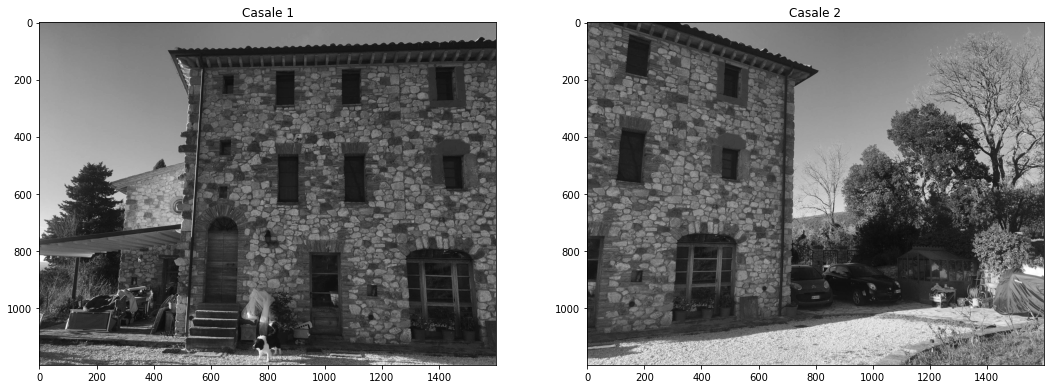

In [46]:
plt.figure(figsize = (18,9))

plt.subplot(121)
plt.imshow(casale1, cmap = 'gray')
plt.title('Casale 1')

plt.subplot(122)
plt.imshow(casale2, cmap = 'gray')
plt.title('Casale 2')
plt.show()

In [12]:
print("Dimension image 1:", casale1.shape)
print("Dimension image 2:", casale2.shape)

Dimension image 1: (1200, 1600)
Dimension image 2: (1200, 1600)


## Keypoint e Descriptor
SIFT algorithms allows to find keypoints and descriptors

In [13]:
sift = cv.xfeatures2d.SIFT_create()
kps1, features1 = sift.detectAndCompute(casale1, None)
kps2, features2 = sift.detectAndCompute(casale2, None)

In [14]:
print("Keypoint in casale 1:", len(kps1))
print("Keypoint in casale 2:", len(kps2))

Keypoint in casale 1: 13571
Keypoint in casale 2: 17830


In [19]:
# SIFT
box_kps_b1 = cv.drawKeypoints(casale1, kps1, None,
                             flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
box_kps_b2 = cv.drawKeypoints(casale2, kps2, None,
                             flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)




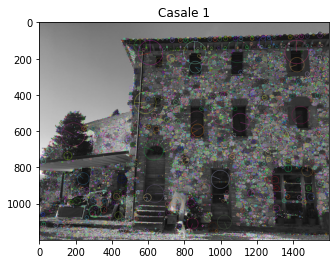

In [16]:

plt.imshow(box_kps_b1, cmap = 'gray')
plt.title('Casale 1')
plt.show()

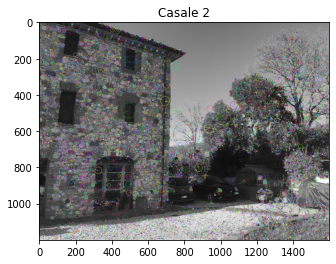

In [17]:

plt.imshow(box_kps_b2, cmap = 'gray')
plt.title('Casale 2')
plt.show()

## Matching

Find Matching point (point in figure 1 that correnspond to those in figure 2). Since many keypoint have been found and since the casale images have many similar brick, the task could not well performe on this type of image.  

In [18]:
#-- Match features
bf = cv.BFMatcher(crossCheck = True)
matches = bf.match(features1, features2)


many keypoint matches results in being the bricks. some points are wrong assigned like the door on the right image which is associated with the step on the left. 

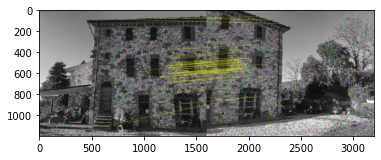

In [24]:

matches = sorted(matches, key = lambda x:x.distance)
result = cv.drawMatches(casale1, kps1, casale2, kps2,
                        matches[0 : 50], None,
                        matchColor = [255, 255, 0])

plt.imshow(result)
plt.show()

### Homography

In [25]:
source_pts = np.asarray([kps1[m.queryIdx].pt for m in matches])
destination_pts = np.asarray([kps2[m.trainIdx].pt for m in matches])

H, mask = cv.findHomography(destination_pts,
                            source_pts,
                            cv.RANSAC)

### Transoform image 2

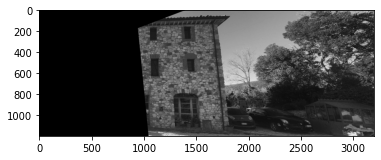

In [48]:
warp_imgs = cv.warpPerspective(casale2, H, dsize = (3200, 1200))
plt.imshow(warp_imgs, cmap = 'gray')
plt.show()

## Integration

resulting image is really satisfying, the effect of the homography cas be seen in the cars present in the left part which are a little bit stretched. since the stitching occurs in the front of the house, the effect of stitching is hidden by the numerous bricks.

In [49]:
stitched_img = np.concatenate((casale1,warp_imgs[:, casale1.shape[1] + 1:]),
                              axis = 1)

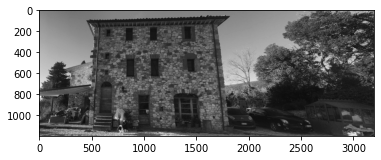

In [50]:
plt.imshow(stitched_img, cmap = 'gray')
plt.show()